# Item-Based Collaborative Filtering in Python

# 출처 -[https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab](https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab)

Item-based collaborative filtering is the recommendation system to use the similarity between items using the ratings by users. In this article, I explain its basic concept and practice how to make the item-based collaborative filtering using Python.

아이템 기반 협업 필터링은 사용자의 평점을 이용하여 아이템 간의 유사도를 활용하는 추천 시스템입니다. 이 기사에서는 Python을 사용하여 항목 기반 협업 필터링을 만드는 방법의 기본 개념과 실습을 설명합니다.

# Basic Concept


The fundamental assumption for this method is that a user gives similar ratings to similar movies. Consider the following table for movie ratings.

이 방법의 기본 가정은 사용자가 유사한 영화에 유사한 평점을 부여한다는 것입니다. 영화 평점에 대해 다음 표를 고려하십시오.

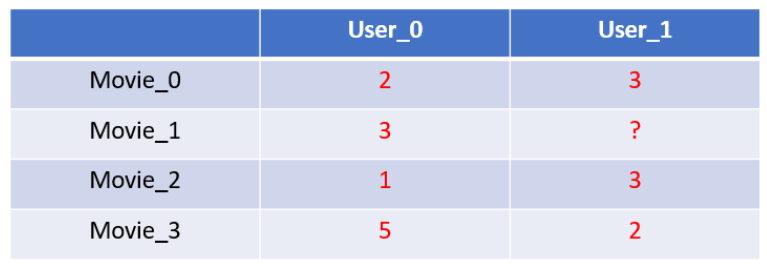

In [3]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211229_045221_1.png")

In this example, the rating for Movie_1 by User_1 is empty. Let’s predict this rating using the item-based collaborative filtering.

Step 1: Find the most similar (the nearest) movies to the movie for which you want to predict the rating.

There are multiple ways to find the nearest movies. Here, I use the cosine similarity. In using the cosine similarity, replace the missing value for 0. Look at the graph below. The x-axis represents ratings by User_0 and the y-axis ratings by User_1. Then, we can find points for each movie in the space. For example, Movie_3 corresponds to the point (5,2) in the space.

이 예에서, User_1의 Movie_1 평점은 비어 있습니다. 아이템 기반 협업 필터링을 사용하여 이 평점을 예측해 보겠습니다.

1단계: 평점을 예측하려는 영화와 가장 유사한(가장 가까운) 영화를 찾습니다.

가장 가까운 영화를 찾는 방법에는 여러 가지가 있습니다. 여기서는 코사인 유사도를 사용합니다. 코사인 유사도를 사용할 때 결측값을 0으로 바꾸십시오. 아래 그래프를 보십시오. x축은 User_0의 평점을 나타내고 y축은 User_1의 평점을 나타냅니다. 그런 다음 공간에서 각 영화에 대한 포인트를 찾을 수 있습니다. 예를 들어 Movie_3은 공간에서 점 (5,2)에 해당합니다.

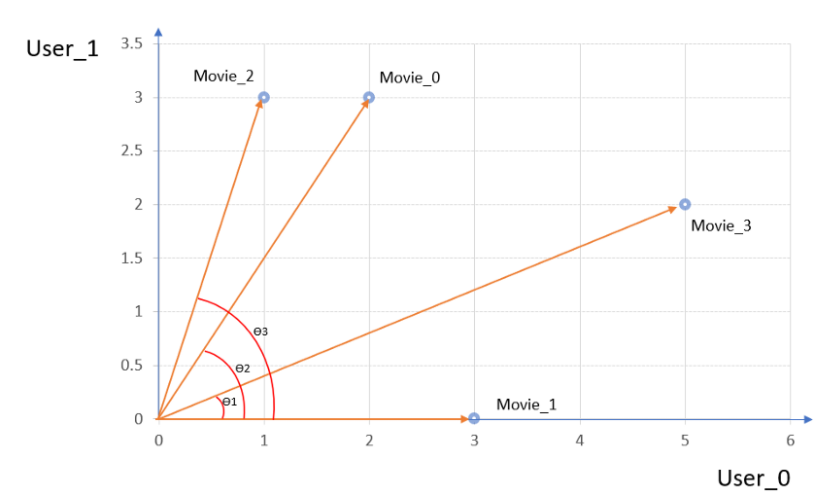

In [4]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211229_050559_1.png")

The cosine similarity uses cos(θ) to measure the distance between two vectors. As θ increases, cos(θ) decreases (cos(θ) = 1 when θ = 0 and cos(θ) = 0 when θ = 90). Therefore, as the value of θ is smaller, the two vectors are considered closer (the similarity gets greater). Since θ1 is the smallest and θ3 is the largest, Movie_3 is the closest to Movie_1, and Movie_2 is the farthest.

코사인 유사도는 cos(θ)를 사용하여 두 벡터 사이의 거리를 측정합니다. θ가 증가함에 따라 cos(θ)는 감소합니다(θ = 0일 때 cos(θ) = 1, θ = 90일 때 cos(θ) = 0). 따라서 θ의 값이 작을수록 두 벡터가 더 가까운 것으로 간주됩니다(유사도가 커짐). θ1이 가장 작고 θ3이 가장 크므로 Movie_3은 Movie_1에 가장 가깝고 Movie_2는 가장 멀리 있습니다.

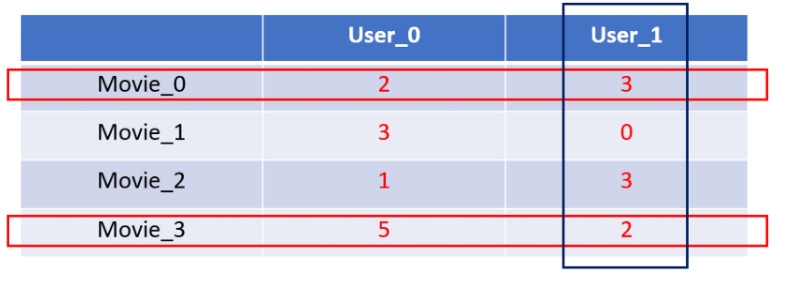

In [1]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_132315_1.png")

What is noteworthy here is that the similarities between movies are determined by ALL USERS. 

For example, the similarity between Movie_1 and Movie_3 is calculated using the ratings by both of User_0 and User_1.

여기서 주목할 점은 영화 간의 유사성은 모든 사용자가 결정한다는 것입니다. 

예를 들어, Movie_1과 Movie_3 사이의 유사도는 User_0과 User_1 모두의 평점을 사용하여 계산됩니다.

Step 2: Calculate the weighted average of the ratings for the most similar movies by the user.

A user gives similar ratings to similar movies. 

Therefore, when we predict a rating for a movie by a user, it is reasonable to use the average of ratings for the similar movies by the user. 

Set the number of the nearest neighbors as 2. 

Then we use Movie_3 and Movie_0 to predict the rating for Movie_0 by User_1.

2단계: 사용자가 가장 유사한 영화에 대한 평점의 가중 평균을 계산합니다.

사용자가 유사한 영화에 유사한 평점을 부여합니다. 

따라서 사용자의 영화에 대한 평점을 예측할 때, 유사한 영화에 대한 사용자의 평균 평점을 사용하는 것이 합리적입니다. 

가장 가까운 이웃의 수를 2로 설정합니다. 

그런 다음 Movie_3 및 Movie_0을 사용하여 User_1이 Movie_0에 대한 평점을 예측합니다.

The rating for Movie_3 by User_1 is 2, and the rating for Movie_0 by User_1 is 3. 

If Movie_3 and Movie_0 are similar to Movie_1 at the same distance, we can estimate the rating for Movie_1 by User_1 as 2.5. 

However, if Movie_3 is considered closer to Movie_1, the weight for Movie_3 should be greater than that for Movie_0. 

Therefore, the predicted rating for Movie_1 will be closer to the rating for Movie_3 as the picture below indicates. 

Using the cosine similarity as the weight, the predicted rating is 2.374.

User_1의 Movie_3에 대한 평가는 2이고 User_1의 Movie_0에 대한 평가는 3입니다.

Movie_3과 Movie_0이 같은 거리에서 Movie_1과 비슷하다면 User_1의 Movie_1에 대한 평점은 2.5로 추정할 수 있습니다.

그러나 Movie_3이 Movie_1에 더 가깝다고 간주되면 Movie_3의 가중치는 Movie_0의 가중치보다 커야 합니다.

따라서 Movie_1에 대한 예상 평점은 아래 그림과 같이 Movie_3에 대한 평점에 더 가깝습니다.

코사인 유사도를 가중치로 사용하여 예측 평점은 2.374입니다.

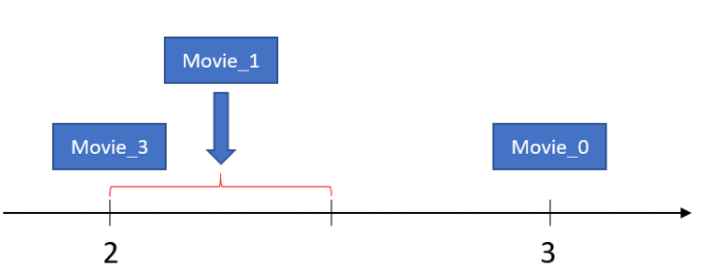

In [3]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_132804_1.png")

# Making a Movie Recommender

For better understanding, the dataset with 10 movies and 10 users is used here. (the numbers are randomly selected.)

df

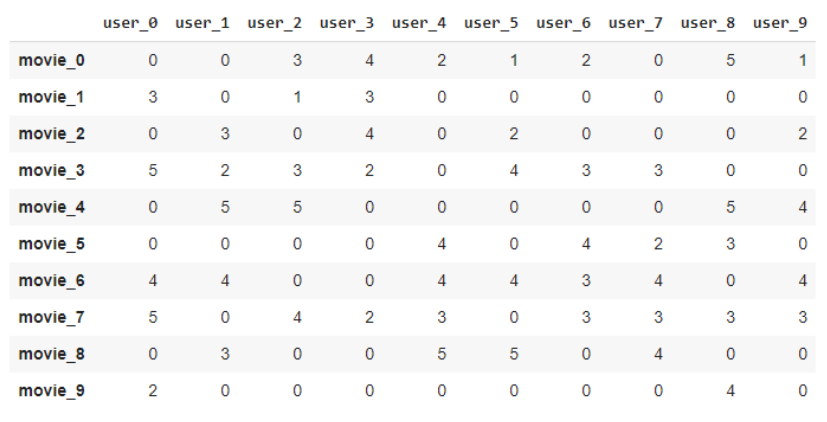

In [4]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_133016_1.png")

- 10 movies and 10 users

- 0 represents missing values.

- The percentage of users rating movies is 50% (only 50 ratings are given). In real movie datasets, this percentage becomes less than 10%.

# Calculate the Nearest Neighbors

The NearestNeighbors() in the sklearn.neighbors library can be used to calculate the distance between movies using the cosine similarity and find the nearest neighbors for each movie.

from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute')

knn.fit(df.values)

distances, indices = knn.kneighbors(df.values, n_neighbors=3)

The number of the nearest neighbors (n_neighbors)is set to be 3. Since this includes the movie itself, generally it finds two nearest movies except the movie itself.

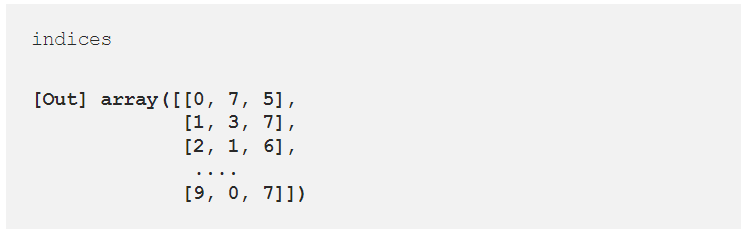

In [6]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_133407_1.png")

indices shows the indices of the nearest neighbors for each movie. 

Each row corresponds to the row in the df. 

The first element in a row is the most similar (nearest) movie. 

Generally, it is the movie itself. 

The second element is the second nearest, and the third is the third nearest. For example, in the first row [0,7,5], the nearest movie to movie_0 is itself, the second nearest movie is movie_7, and the third is movie_5.

indices는 각 영화에 대한 최근접 이웃의 색인을 보여줍니다. 

각 행은 df의 행에 해당합니다. 

행의 첫 번째 요소는 가장 유사한(가장 가까운) 영화입니다. 

일반적으로 영화 자체입니다. 

두 번째 요소는 두 번째로 가까운 요소이고 세 번째 요소는 세 번째로 가까운 요소입니다. 

예를 들어, 첫 번째 행 [0,7,5]에서 movie_0에 가장 가까운 영화는 그 자체이고 두 번째로 가까운 영화는 movie_7이고 세 번째 행은 movie_5입니다.

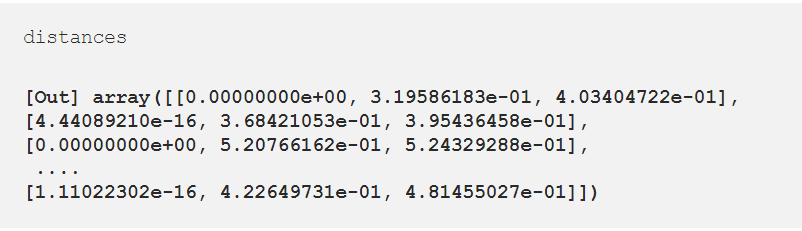

In [7]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_133838_1.png")

distances shows the distance between movies. A smaller number means the movie is closer. Each number in this array corresponds to the number in the indices array.

distances는 영화 사이의 거리를 나타냅니다. 

숫자가 작을수록 영화가 더 가깝다는 의미입니다. 

이 배열의 각 숫자는 indices 배열의 숫자에 해당합니다.

# Example: Predict a Rating for a Movie by a User

Predicting a rating for a movie by a user is equivalent to calculating the weighted average of ratings for the similar movies by the user.

For practice, predict the rating for movie_0 by user_7. First, find the nearest neighbors for movie_0 using NearestNeighbors().

# 예: 사용자의 영화 평가 예측

사용자가 어떤 영화에 대한 평점을 예측한다는 것은 유사한 영화에 대한 사용자의 가중 평균을 계산하는 것과 같습니다.

연습을 위해 user_7의 movie_0 평점을 예측해 보세요. 먼저 NearestNeighbors()를 사용하여 movie_0에 대한 가장 가까운 이웃을 찾습니다.


## get the index for 'movie_0'
index_for_movie = df.index.tolist().index('movie_0')
## find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()
## distances between 'movie_0' and the similar movies
movie_distances = distances[index_for_movie].tolist()
## the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
## remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)
## remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)

print('The Nearest Movies to movie_0:', sim_movies)

print('The Distance from movie_0:', movie_distances)

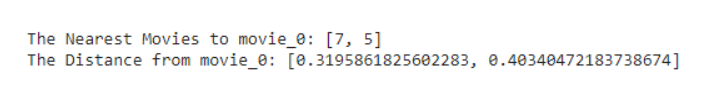

In [9]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_134649_1.png")

The most similar movies to movie_0 are movie_7 and movie_5, and the distances from movie_0 are 0.3196 and 0.4034, respectively.

movie_0과 가장 유사한 영화는 movie_7과 movie_5이고, movie_0과의 거리는 각각 0.3196과 0.4034입니다.



The formula to calculate the predicted rating is as follows:

R(m, u) = {∑ ⱼ S(m, j)R(j, u)}/ ∑ ⱼ S(m, j)

- R(m, u): the rating for movie m by user u

- S(m, j): the similarity between movie m and movie j

- j ∈ J where J is the set of the similar movies to movie m

This formula simply implies that the predicted rating for movie m by user u is the weighted average of ratings for the similar movies by user u. The weight for each rating, (S(m, k)/∑ ⱼ S(m, j)), becomes greater when movie m and movie k are closer. The denominator of this term makes the sum of all the weights equal 1.

이 공식은 단순히 사용자 u에 의한 영화 m에 대한 예측 평점이 사용자 u에 의한 유사한 영화에 대한 평점의 가중 평균임을 의미합니다. 

영화 m과 영화 k가 가까울수록 평점별 가중치(S(m, k)/∑ ⱼ S(m, j))가 커집니다. 이 항의 분모는 모든 가중치의 합을 1로 만듭니다.



Let’s predict the rating for movie_0 by user_7, R(0,7):

R(0,7)=[S(0,5)∗R(5,7)+S(0,7)∗R(7,7)]/[S(0,5)+S(0,7)]

Since the distances between movie_0 and movie_5 and between movie_0 and movie_7 are 0.4034 and 0.3196, the similarities are

S(0,5) = (1-0.4034)

S(0,7) = (1-0.3196).

Because R(5,7) = 2 and R(7,7) = 3, the predicted R(0,7) is 2.5328.

# Build a Recommender

The code below predicts the ratings for all the movie which user_4 has not watched. (n_neighbors = 3)


In [ ]:
# copy df
df1 = df.copy()

# find the nearest neighbors using NearestNeighbors(n_neighbors=3)
number_neighbors = 3
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

# convert user_name to user_index
user_index = df.columns.tolist().index('user_4')

# t: movie_title, m: the row number of t in df
for m,t in list(enumerate(df.index)):
  
  # find movies without ratings by user_4
  if df.iloc[m, user_index] == 0:
    sim_movies = indices[m].tolist()
    movie_distances = distances[m].tolist()
    
    # Generally, this is the case: indices[3] = [3 6 7]. The movie itself is in the first place.
    # In this case, we take off 3 from the list. Then, indices[3] == [6 7] to have the nearest NEIGHBORS in the list. 
    if m in sim_movies:
      id_movie = sim_movies.index(m)
      sim_movies.remove(m)
      movie_distances.pop(id_movie) 

    # However, if the percentage of ratings in the dataset is very low, there are too many 0s in the dataset. 
    # Some movies have all 0 ratings and the movies with all 0s are considered the same movies by NearestNeighbors(). 
    # Then,even the movie itself cannot be included in the indices. 
    # For example, indices[3] = [2 4 7] is possible if movie_2, movie_3, movie_4, and movie_7 have all 0s for their ratings.
    # In that case, we take off the farthest movie in the list. Therefore, 7 is taken off from the list, then indices[3] == [2 4].
    else:
      sim_movies = sim_movies[:n_neighbors-1]
      movie_distances = movie_distances[:n_neighbors-1]
        
    # movie_similarty = 1 - movie_distance    
    movie_similarity = [1-x for x in movie_distances]
    movie_similarity_copy = movie_similarity.copy()
    nominator = 0

    # for each similar movie
    for s in range(0, len(movie_similarity)):
      
      # check if the rating of a similar movie is zero
      if df.iloc[sim_movies[s], user_index] == 0:

        # if the rating is zero, ignore the rating and the similarity in calculating the predicted rating
        if len(movie_similarity_copy) == (number_neighbors - 1):
          movie_similarity_copy.pop(s)
          
        else:
          movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))

      # if the rating is not zero, use the rating and similarity in the calculation
      else:
        nominator = nominator + movie_similarity[s]*df.iloc[sim_movies[s],user_index]

    # check if the number of the ratings with non-zero is positive
    if len(movie_similarity_copy) > 0:
      
      # check if the sum of the ratings of the similar movies is positive.
      if sum(movie_similarity_copy) > 0:
        predicted_r = nominator/sum(movie_similarity_copy)

      # Even if there are some movies for which the ratings are positive, some movies have zero similarity even though they are selected as similar movies.
      # in this case, the predicted rating becomes zero as well  
      else:
        predicted_r = 0

    # if all the ratings of the similar movies are zero, then predicted rating should be zero
    else:
      predicted_r = 0

  # place the predicted rating into the copy of the original dataset
    df1.iloc[m,user_index] = predicted_r

The copy of the original dataset, df1, updates all the predicted ratings for user_4. The following code is the function to show the recommended movies for a selected user using the updated dataset.

In [ ]:
def recommend_movies(user, num_recommended_movies):

  print('The list of the Movies {} Has Watched \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_movies = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_movies.append((m, predicted_rating))

  sorted_rm = sorted(recommended_movies, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended Movies \n')
  rank = 1
  for recommended_movie in sorted_rm[:num_recommended_movies]:
    
    print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
    rank = rank + 1

For example, let’s get 5 recommended movies for user_4.


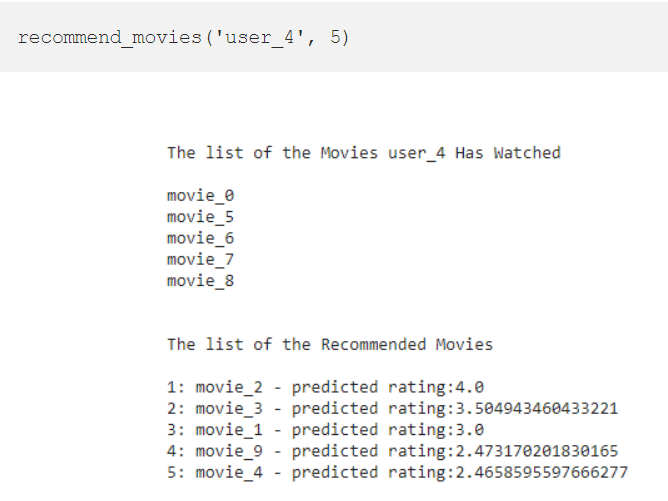

In [10]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_140255_1.png")